# EDA

In [1]:
import numpy as np 
import pandas as pd 

import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px




In [2]:
dataset = pd.read_csv("/Users/adityasood/Downloads/2010_Census_Populations_by_Zip_Code.csv")

In [3]:
dataset.shape

(319, 7)

In [4]:
dataset.size

2233

In [5]:
dataset

Zip Code  Total Population  Median Age  Total Males  Total Females  \
0       91371                 1        73.5            0              1   
1       90001             57110        26.6        28468          28642   
2       90002             51223        25.5        24876          26347   
3       90003             66266        26.3        32631          33635   
4       90004             62180        34.8        31302          30878   
..        ...               ...         ...          ...            ...   
314     93552             38158        28.4        18711          19447   
315     93553              2138        43.3         1121           1017   
316     93560             18910        32.4         9491           9419   
317     93563               388        44.5          263            125   
318     93591              7285        30.9         3653           3632   

     Total Households  Average Household Size  
0                   1                    1.00  
1               12971                    4.40  
2               11731                    4.36  
3               15642                    4.22  
4               22547                    2.73  
..                ...                     ...  
314              9690                    3.93  
315               816                    2.62  
316              6469                    2.92  
317               103                    2.53  
318              1982                    3.67  

[319 rows x 7 columns]

In [6]:
dataset.info

<bound method DataFrame.info of      Zip Code  Total Population  Median Age  Total Males  Total Females  \
0       91371                 1        73.5            0              1   
1       90001             57110        26.6        28468          28642   
2       90002             51223        25.5        24876          26347   
3       90003             66266        26.3        32631          33635   
4       90004             62180        34.8        31302          30878   
..        ...               ...         ...          ...            ...   
314     93552             38158        28.4        18711          19447   
315     93553              2138        43.3         1121           1017   
316     93560             18910        32.4         9491           9419   
317     93563               388        44.5          263            125   
318     93591              7285        30.9         3653           3632   

     Total Households  Average Household Size  
0                  

In [7]:
dataset.head()

Zip Code  Total Population  Median Age  Total Males  Total Females  \
0     91371                 1        73.5            0              1   
1     90001             57110        26.6        28468          28642   
2     90002             51223        25.5        24876          26347   
3     90003             66266        26.3        32631          33635   
4     90004             62180        34.8        31302          30878   

   Total Households  Average Household Size  
0                 1                    1.00  
1             12971                    4.40  
2             11731                    4.36  
3             15642                    4.22  
4             22547                    2.73

In [8]:
dataset.tail()

Zip Code  Total Population  Median Age  Total Males  Total Females  \
314     93552             38158        28.4        18711          19447   
315     93553              2138        43.3         1121           1017   
316     93560             18910        32.4         9491           9419   
317     93563               388        44.5          263            125   
318     93591              7285        30.9         3653           3632   

     Total Households  Average Household Size  
314              9690                    3.93  
315               816                    2.62  
316              6469                    2.92  
317               103                    2.53  
318              1982                    3.67

In [9]:
duplicate = dataset[dataset.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Zip Code, Total Population, Median Age, Total Males, Total Females, Total Households, Average Household Size]
Index: []

In [10]:
dataset.describe()  

Zip Code  Total Population  Median Age   Total Males  \
count    319.000000        319.000000  319.000000    319.000000   
mean   91000.673981      33241.341693   36.527586  16391.564263   
std      908.360203      21644.417455    8.692999  10747.495566   
min    90001.000000          0.000000    0.000000      0.000000   
25%    90243.500000      19318.500000   32.400000   9763.500000   
50%    90807.000000      31481.000000   37.100000  15283.000000   
75%    91417.000000      44978.000000   41.000000  22219.500000   
max    93591.000000     105549.000000   74.000000  52794.000000   

       Total Females  Total Households  Average Household Size  
count     319.000000        319.000000              319.000000  
mean    16849.777429      10964.570533                2.828119  
std     10934.986468       6270.646400                0.835658  
min         0.000000          0.000000                0.000000  
25%      9633.500000       6765.500000                2.435000  
50%     16202.000000      10968.000000                2.830000  
75%     22690.500000      14889.500000                3.320000  
max     53185.000000      31087.000000                4.670000

In [11]:
dataset.dtypes

Zip Code                    int64
Total Population            int64
Median Age                float64
Total Males                 int64
Total Females               int64
Total Households            int64
Average Household Size    float64
dtype: object

In [12]:
dataset.corr()

Zip Code  Total Population  Median Age  Total Males  \
Zip Code                1.000000         -0.088365    0.079490    -0.087803   
Total Population       -0.088365          1.000000   -0.256694     0.998214   
Median Age              0.079490         -0.256694    1.000000    -0.263065   
Total Males            -0.087803          0.998214   -0.263065     1.000000   
Total Females          -0.088609          0.998275   -0.249539     0.992983   
Total Households       -0.160763          0.909057   -0.129471     0.905498   
Average Household Size  0.157264          0.568202   -0.102955     0.566276   

                        Total Females  Total Households  \
Zip Code                    -0.088609         -0.160763   
Total Population             0.998275          0.909057   
Median Age                  -0.249539         -0.129471   
Total Males                  0.992983          0.905498   
Total Females                1.000000          0.909390   
Total Households             0.909390          1.000000   
Average Household Size       0.568116          0.316132   

                        Average Household Size  
Zip Code                              0.157264  
Total Population                      0.568202  
Median Age                           -0.102955  
Total Males                           0.566276  
Total Females                         0.568116  
Total Households                      0.316132  
Average Household Size                1.000000

In [13]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

In [14]:
print('Covariance:')
dataset.cov()

Covariance:


Zip Code  Total Population    Median Age  \
Zip Code                8.251183e+05     -1.737335e+06    627.682921   
Total Population       -1.737335e+06      4.684808e+08 -48298.296563   
Median Age              6.276829e+02     -4.829830e+04     75.568230   
Total Males            -8.571863e+05      2.322078e+08 -24577.660898   
Total Females          -8.801486e+05      2.362730e+08 -23720.635665   
Total Households       -9.157070e+05      1.233813e+08  -7057.536858   
Average Household Size  1.193755e+02      1.027726e+04     -0.747907   

                         Total Males  Total Females  Total Households  \
Zip Code               -8.571863e+05  -8.801486e+05     -9.157070e+05   
Total Population        2.322078e+08   2.362730e+08      1.233813e+08   
Median Age             -2.457766e+04  -2.372064e+04     -7.057537e+03   
Total Males             1.155087e+08   1.166991e+08      6.102490e+07   
Total Females           1.166991e+08   1.195739e+08      6.235636e+07   
Total Households        6.102490e+07   6.235636e+07      3.932101e+07   
Average Household Size  5.085857e+03   5.191398e+03      1.656571e+03   

                        Average Household Size  
Zip Code                            119.375485  
Total Population                  10277.255142  
Median Age                           -0.747907  
Total Males                        5085.857323  
Total Females                      5191.397819  
Total Households                   1656.570982  
Average Household Size                0.698325

In [15]:
def missing_values_table(dataset):
        # Total missing values
        
        miss_val = dataset.isnull().sum()
        
        # Percentage of missing values
        
        miss_val_percent = 100 * dataset.isnull().sum() / len(dataset)
        
        # Make a table with the results
        
        miss_val_tab = pd.concat([miss_val, miss_val_percent], axis=1)
        
        # Rename the columns
        
        miss_val_tab_ren_columns = miss_val_tab.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        
        miss_val_tab_ren_columns = miss_val_tab_ren_columns[
            miss_val_tab_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        
        print ("Your selected dataframe has " + str(dataset.shape[1]) + " columns.\n"      
            "There are " + str(miss_val_tab_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        
        return miss_val_tab_ren_columns

In [16]:
missing= missing_values_table(dataset)
missing

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

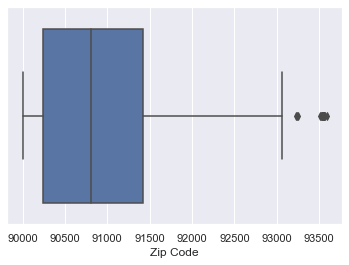

In [17]:
ax=sns.boxplot(dataset['Zip Code'])

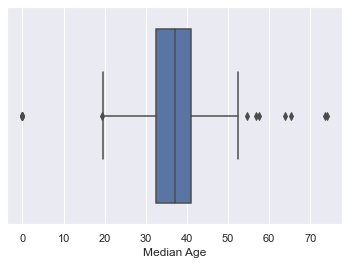

In [18]:
ax=sns.boxplot(dataset['Median Age'])

<AxesSubplot:xlabel='Median Age', ylabel='Total Population'>

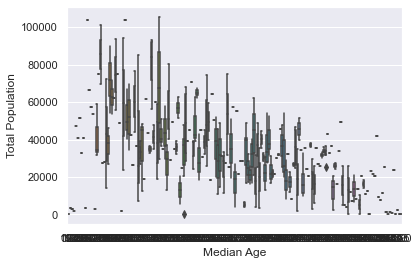

In [19]:
sns.boxplot(x='Median Age', y='Total Population',data = dataset)

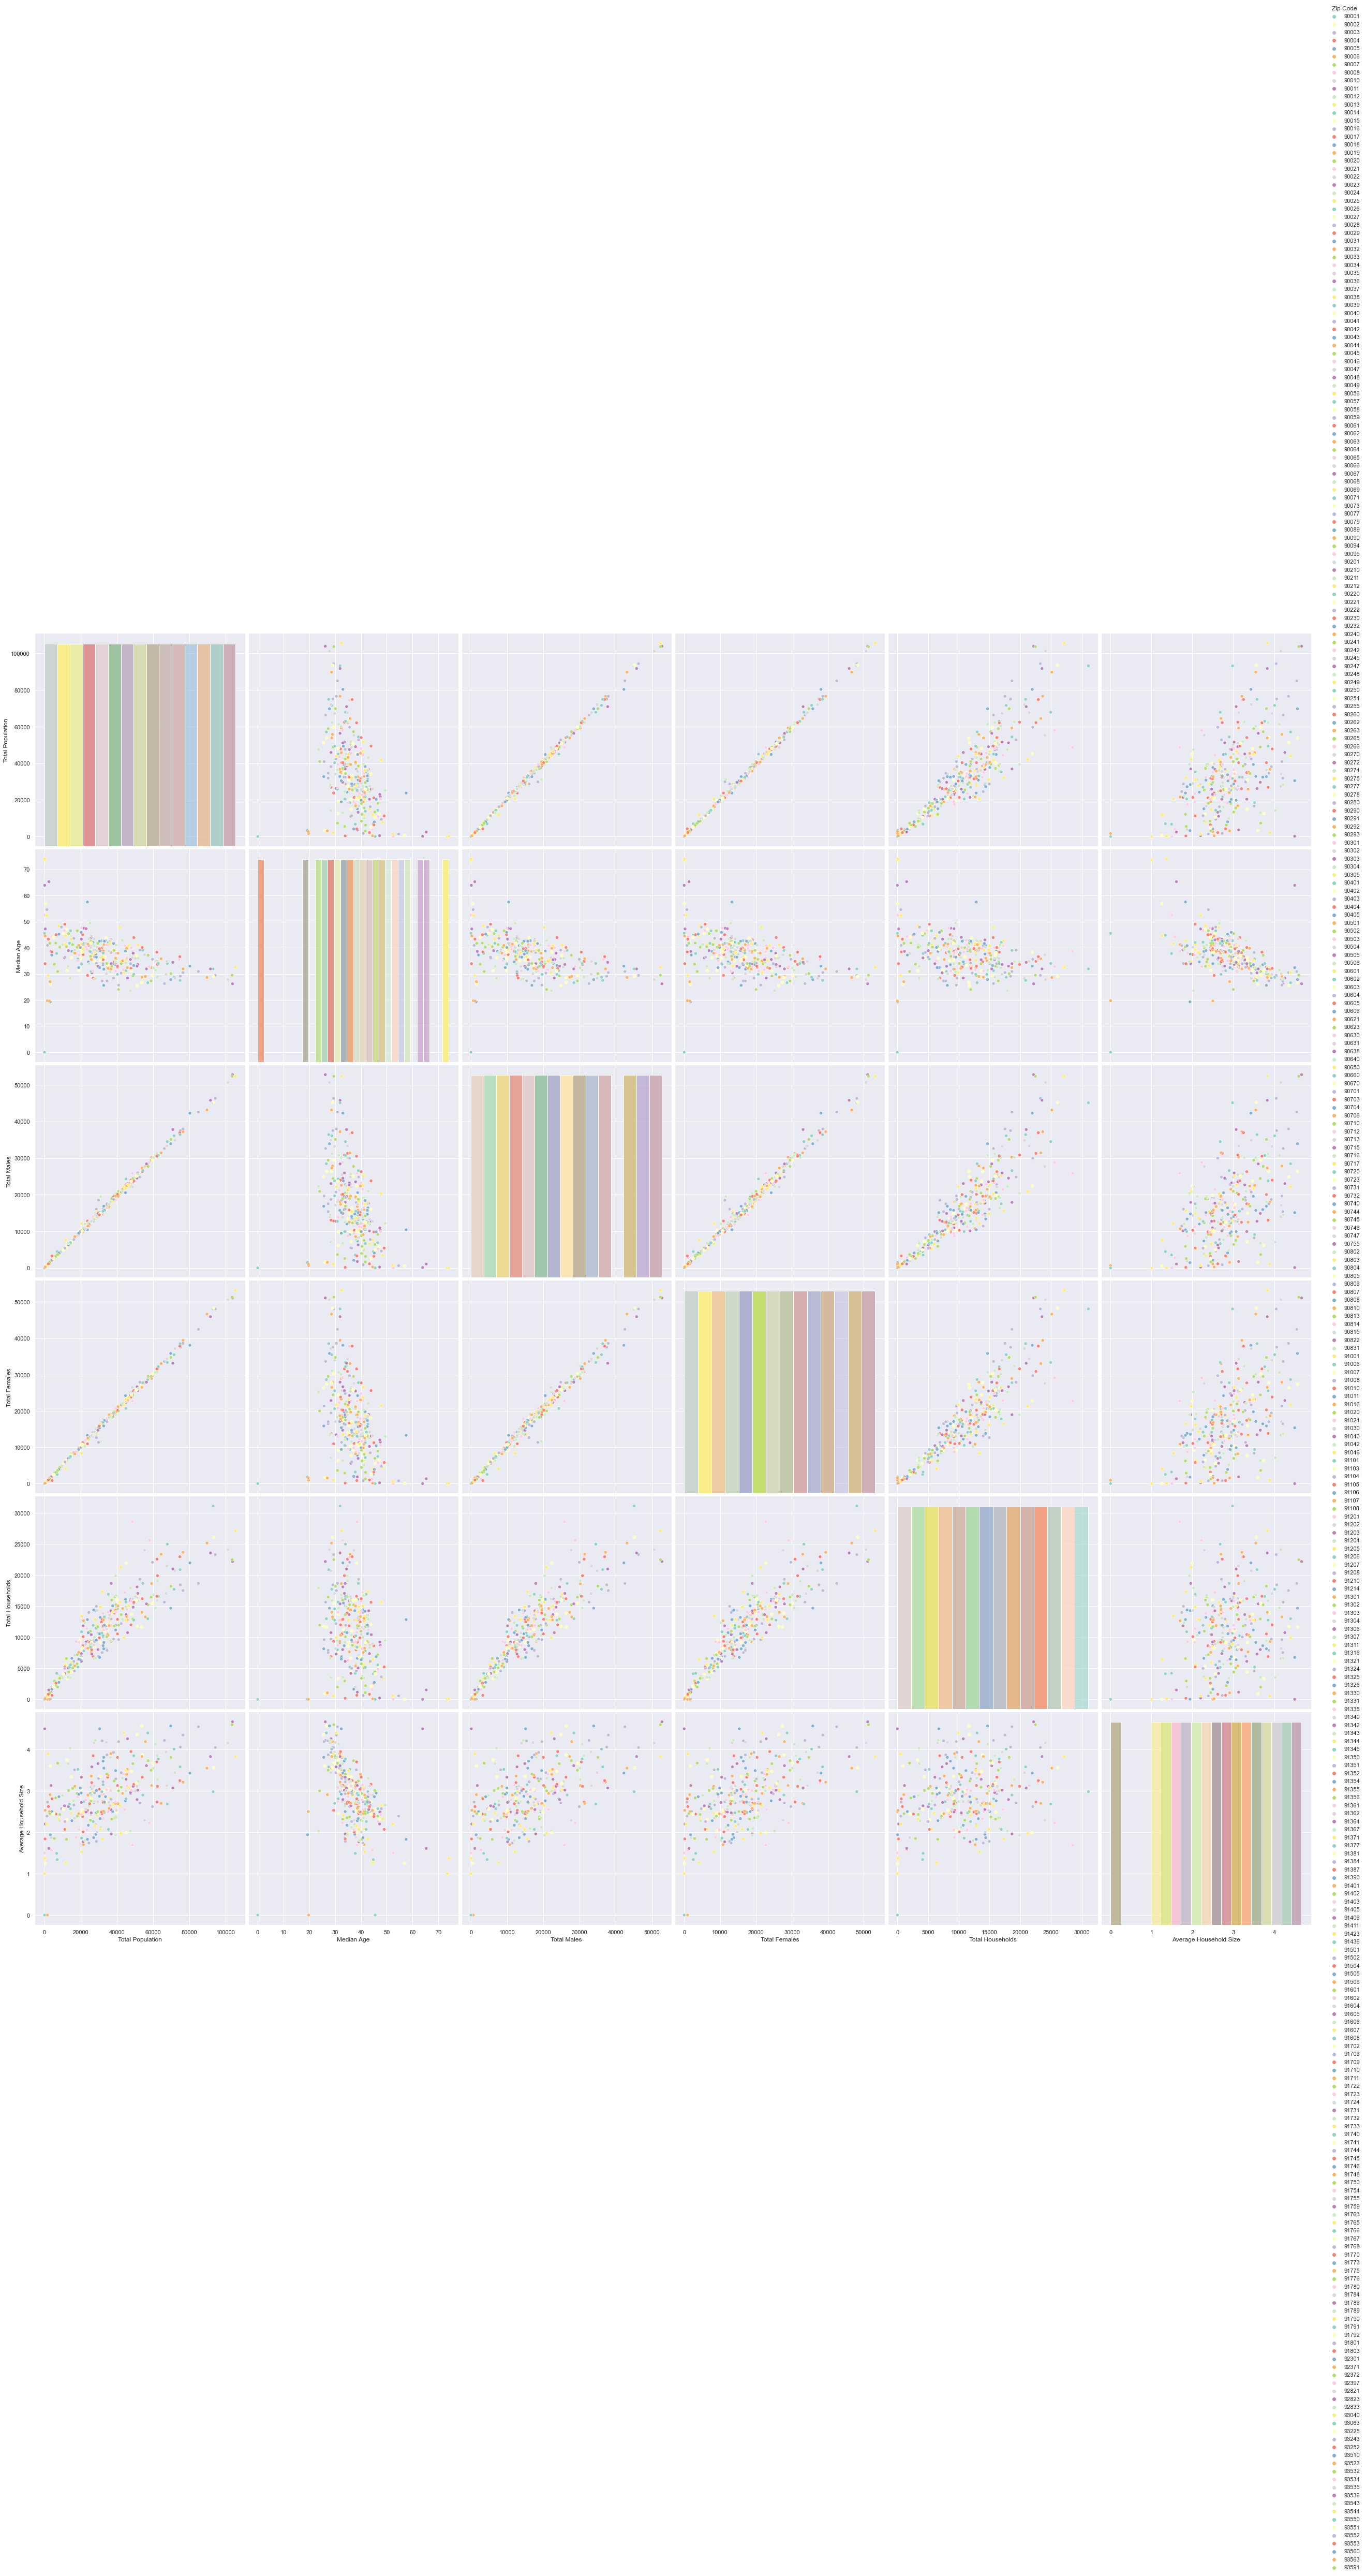

In [20]:
#Pair plot showing relations between different columns with respect to Zip Code

sns.pairplot(dataset, hue="Zip Code", size=6 ,diag_kind="hist", palette = "Set3")

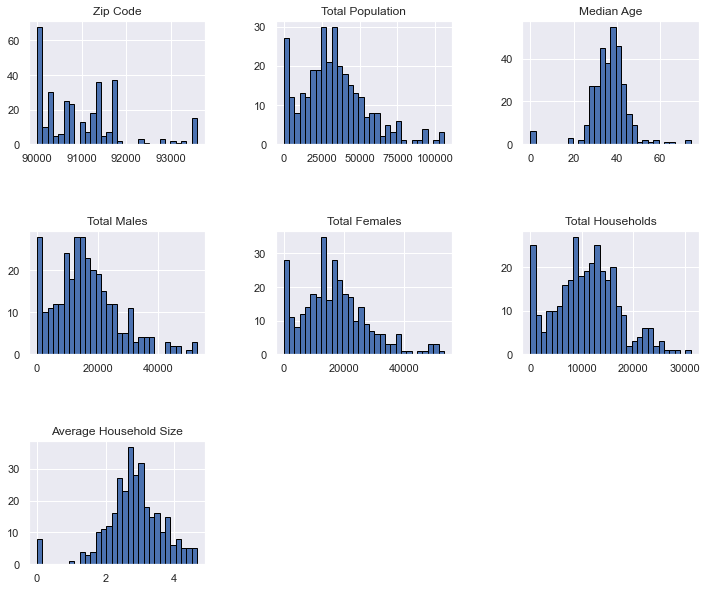

In [21]:
dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

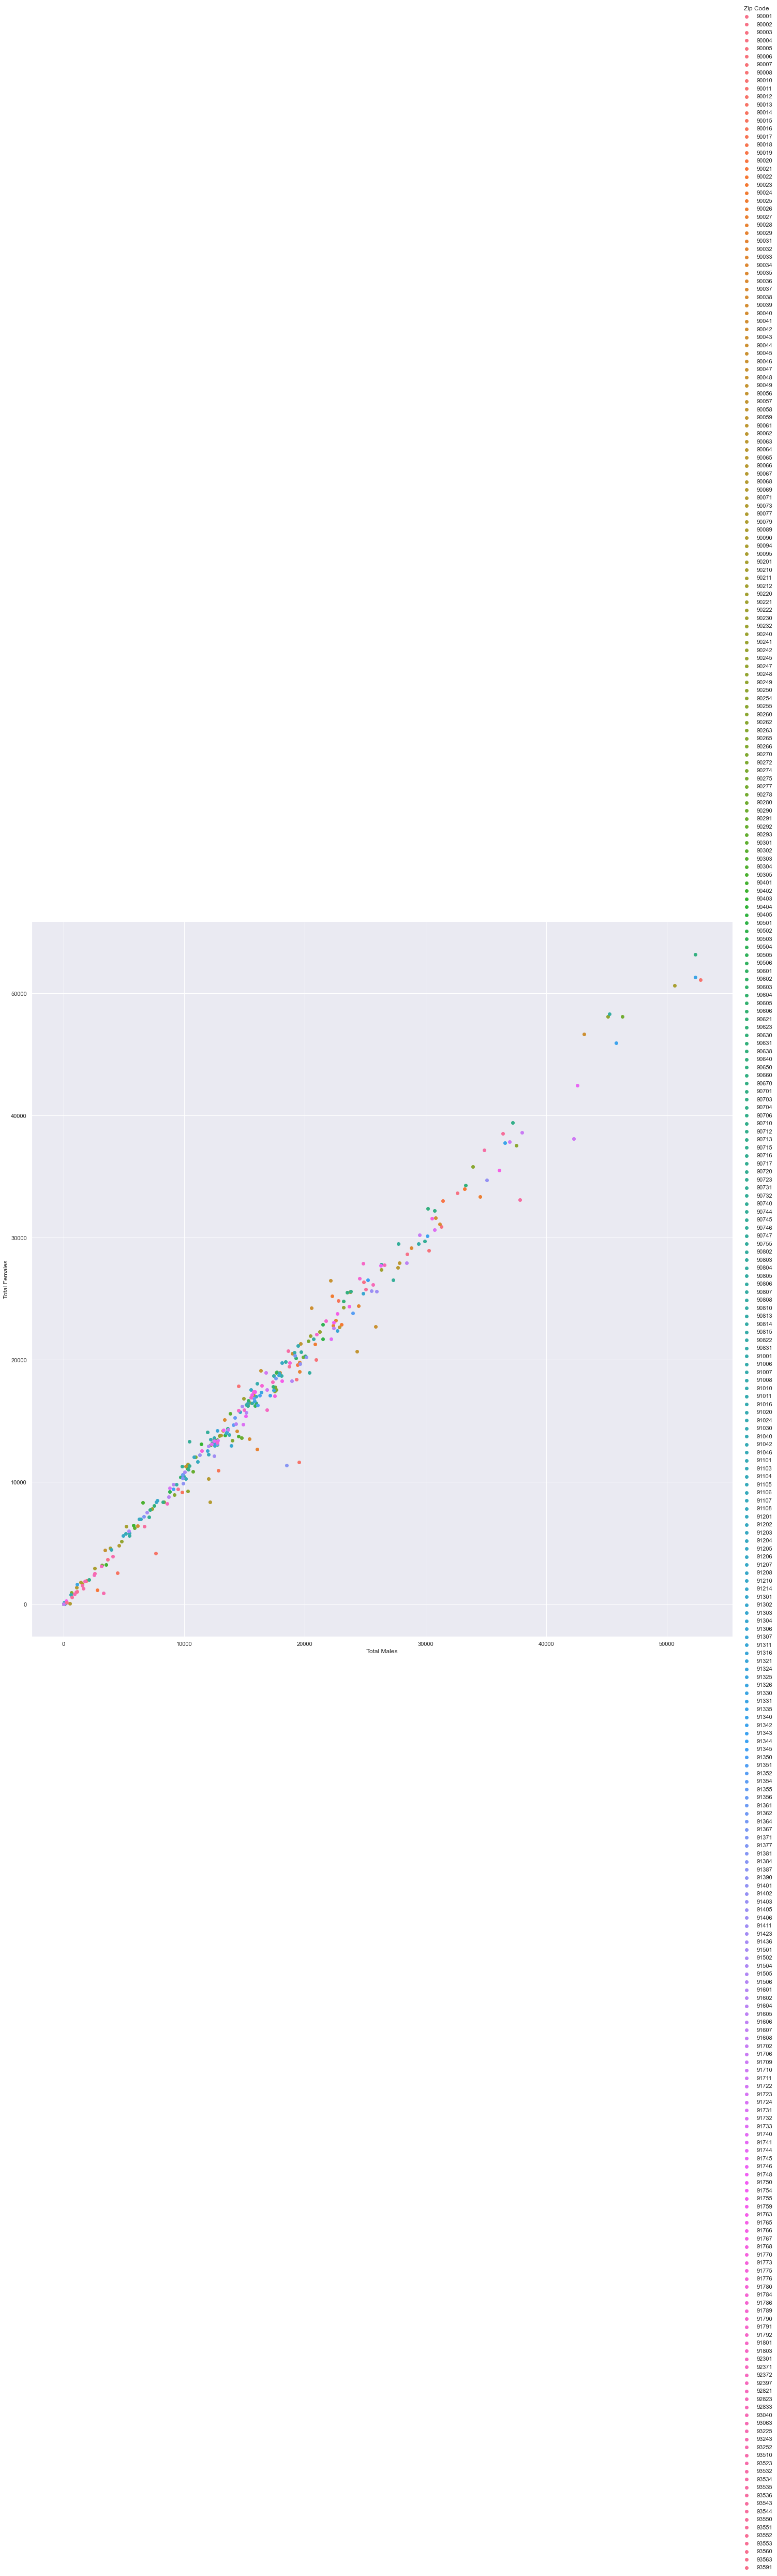

In [22]:
#facet grid to represent the relation between Total Males and Total Females with respect to Zip code.

sns.FacetGrid(dataset, hue="Zip Code", size=20) \
   .map(plt.scatter, "Total Males", "Total Females") \
   .add_legend()

In [23]:
from plotly.subplots import make_subplots

In [24]:
# subplots of different columns 

fig = make_subplots(rows = 2, cols = 3)
row_no = col_no = 1

for col in dataset.columns:
    # only integer fields are allowed and not float datatype
    if(dataset[col].dtype != "O" and dataset[col].dtype != dataset['Zip Code'].dtype):
        fig.add_trace(
            go.Box(y=dataset[col], name = col),
            row = row_no,
            col = col_no,
        )
        col_no += 1
        if col_no % 4 == 0: # necessary calculations for correctly presenting subplots
            row_no = 2
            col_no = 1

fig.update_layout(title_text = "Outlier detection through boxplot")
fig.show()

In [25]:
# subplots of different columns 

fig = make_subplots(rows = 2, cols = 3)
row_no = col_no = 1

for col in dataset.columns:
    # only float fields are allowed and not integer datatype
    if(dataset[col].dtype != "O" and dataset[col].dtype != dataset['Median Age'].dtype):
        fig.add_trace(
            go.Box(y=dataset[col], name = col),
            row = row_no,
            col = col_no,
        )
        col_no += 1
        if col_no % 4 == 0: # necessary calculations for correctly presenting subplots
            row_no = 2
            col_no = 1

fig.update_layout(title_text = "Outlier detection through boxplot")
fig.show()

In [26]:
type(dataset)

pandas.core.frame.DataFrame

In [27]:
dataset.isnull().sum()

Zip Code                  0
Total Population          0
Median Age                0
Total Males               0
Total Females             0
Total Households          0
Average Household Size    0
dtype: int64

In [28]:
#Scatter Plot for Median Age with respect to Zip code

fig = px.scatter(
    dataset,
    x='Zip Code',
    y='Median Age',
    color = 'Zip Code',
    size='Median Age',
    hover_data=['Total Population']
)
fig.show()

In [29]:
#Scatter Plot for Total Males with respect to Zip Code

fig = px.scatter(
    dataset,
    x='Zip Code',
    y='Total Males',
    color = 'Zip Code',
    size='Total Males',
    hover_data=['Total Population']
)
fig.show()

In [30]:
#Scatter Plot for total Females with respect to Zip Code

fig = px.scatter(
    dataset,
    x='Zip Code',
    y='Total Females',
    color = 'Zip Code',
    size='Total Females',
    hover_data=['Total Population']
)
fig.show()

In [31]:
#Scatter Plot for Total households with respect to Zip Code

fig = px.scatter(
    dataset,
    x='Zip Code',
    y='Total Households',
    color = 'Zip Code',
    size='Total Households',
    hover_data=['Average Household Size']
)
fig.show()

In [32]:
#generated matrix for dataset. 

X = dataset.iloc[:, 3].values
print(X)

[    0 28468 24876 32631 31302 19299 30254 20915 14477  1874 52794 19493
  7629  4471  9833 22778 12818 23770 31442 19381  2790 33216 23037 22248
 20859 34515 22362 16056 19575 19546 22564 24425 28828 13326 17914 31187
 15383 14383  6129 13212 30836 20561 43128 18958 25854 22129 10132 16359
  3436 24300  1555 19623 13049 15720 27843 12297 22873 27714  1074 12018
 12153    13   506  4594     0  1436     0  2559     2 50658 10292  3849
  5211 23773 26346 15375 14932  7333 12501 20466 21207  8304 23217  4823
 12897 45113 10273 37525 17509 33919   665  9159 17605 13992 10952 12199
 20283 17521 19848 46321  3180 14757 10729  5890 17633 13803 12733 14503
  6552  3524  5809 11426 10292 13364 21483  8811 21481 15886 17684     0
 15312 12720  9694 19270 20033 15936 17377  7516 23204 33320 23520 30189
 52364 30738  7163  8227 23785  2101 37203 12291 15277 13574  9935  7078
 10317 10423 26315 29951  9843 10423 27298 27754 11944     0  5462 20387
 15609 19686 45229 20717 15153 18408 18067 29425  9

In [33]:
dataset.to_numpy()

array([[9.1371e+04, 1.0000e+00, 7.3500e+01, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.0001e+04, 5.7110e+04, 2.6600e+01, ..., 2.8642e+04, 1.2971e+04,
        4.4000e+00],
       [9.0002e+04, 5.1223e+04, 2.5500e+01, ..., 2.6347e+04, 1.1731e+04,
        4.3600e+00],
       ...,
       [9.3560e+04, 1.8910e+04, 3.2400e+01, ..., 9.4190e+03, 6.4690e+03,
        2.9200e+00],
       [9.3563e+04, 3.8800e+02, 4.4500e+01, ..., 1.2500e+02, 1.0300e+02,
        2.5300e+00],
       [9.3591e+04, 7.2850e+03, 3.0900e+01, ..., 3.6320e+03, 1.9820e+03,
        3.6700e+00]])

In [34]:
data1 = pd.DataFrame(dataset, columns=['Zip Code', 'Median Age', 'Total Population', 'Total Households'])

In [35]:
data1

Zip Code  Median Age  Total Population  Total Households
0       91371        73.5                 1                 1
1       90001        26.6             57110             12971
2       90002        25.5             51223             11731
3       90003        26.3             66266             15642
4       90004        34.8             62180             22547
..        ...         ...               ...               ...
314     93552        28.4             38158              9690
315     93553        43.3              2138               816
316     93560        32.4             18910              6469
317     93563        44.5               388               103
318     93591        30.9              7285              1982

[319 rows x 4 columns]

In [36]:
rowslice = data1.iloc[0:159]

In [37]:
rowslice

Zip Code  Median Age  Total Population  Total Households
0       91371        73.5                 1                 1
1       90001        26.6             57110             12971
2       90002        25.5             51223             11731
3       90003        26.3             66266             15642
4       90004        34.8             62180             22547
..        ...         ...               ...               ...
154     90755        36.1             11074              4172
155     90802        34.7             39347             19853
156     90803        42.7             32031             17318
157     90804        29.8             40311             14556
158     90805        29.0             93524             26056

[159 rows x 4 columns]

In [38]:
rowslice1 = data1.iloc[159:]

In [39]:
rowslice1

Zip Code  Median Age  Total Population  Total Households
159     90806        30.3             42399             12184
160     90807        39.7             31481             12452
161     90808        41.6             38232             14167
162     90810        31.8             36735              9289
163     90813        27.3             58911             16425
..        ...         ...               ...               ...
314     93552        28.4             38158              9690
315     93553        43.3              2138               816
316     93560        32.4             18910              6469
317     93563        44.5               388               103
318     93591        30.9              7285              1982

[160 rows x 4 columns]

In [40]:
merger = pd.concat([rowslice,rowslice1], axis='rows')

In [41]:
merger

Zip Code  Median Age  Total Population  Total Households
0       91371        73.5                 1                 1
1       90001        26.6             57110             12971
2       90002        25.5             51223             11731
3       90003        26.3             66266             15642
4       90004        34.8             62180             22547
..        ...         ...               ...               ...
314     93552        28.4             38158              9690
315     93553        43.3              2138               816
316     93560        32.4             18910              6469
317     93563        44.5               388               103
318     93591        30.9              7285              1982

[319 rows x 4 columns]

In [42]:
data2 = pd.DataFrame(dataset, columns=['Total Population', 'Total Households', 'Median Age'])

In [43]:
data2

Total Population  Total Households  Median Age
0                   1                 1        73.5
1               57110             12971        26.6
2               51223             11731        25.5
3               66266             15642        26.3
4               62180             22547        34.8
..                ...               ...         ...
314             38158              9690        28.4
315              2138               816        43.3
316             18910              6469        32.4
317               388               103        44.5
318              7285              1982        30.9

[319 rows x 3 columns]

In [44]:
Condition1 = data2[data2['Total Households'] > 15000]

In [45]:
Condition1

Total Population  Total Households  Median Age
3               66266             15642        26.3
4               62180             22547        34.8
5               37681             15044        33.9
6               59185             18617        32.4
10             103892             22168        26.2
..                ...               ...         ...
300             54366             18650        39.0
308             72046             20672        28.3
309             70918             20964        34.4
312             74929             20864        27.5
313             50798             15963        37.0

[78 rows x 3 columns]

In [46]:
Condition2 = data2[data2['Total Households']  >= 9690]

In [47]:
Condition2

Total Population  Total Households  Median Age
1               57110             12971        26.6
2               51223             11731        25.5
3               66266             15642        26.3
4               62180             22547        34.8
5               37681             15044        33.9
..                ...               ...         ...
308             72046             20672        28.3
309             70918             20964        34.4
312             74929             20864        27.5
313             50798             15963        37.0
314             38158              9690        28.4

[181 rows x 3 columns]

In [48]:
from PIL import Image
import numpy as np


In [49]:
gray = np.array(Image.open('house.jpg').convert('L'))

print(gray.shape) 

(446, 596)


In [50]:
# operation on image : inverse (Saved in the working directory)

im = np.array(Image.open('house.jpg').resize((256, 256)))

im_i = 255 - im

Image.fromarray(im_i).save('inverse_house.jpg')

In [51]:
# Operation on Image : reduction (Saved in the working directory)

im = np.array(Image.open('house.jpg').resize((256, 256)))

im_32 = im // 32 * 32
im_128 = im // 128 * 128

im_dec = np.concatenate((im, im_32, im_128), axis=1)

Image.fromarray(im_dec).save('reduction_pg_2.png')

In [52]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [53]:
from PIL import Image

# open the image file
image = Image.open('house.jpg')

# set the cropping dimensions
left = 50
top = 50
right = 200
bottom = 200

# crop the image
cropped_image = image.crop((left, top, right, bottom))

# save the cropped image
cropped_image.save('cropped_image.jpg')


In [ ]:
import cv2

# Load input image
img = cv2.imread("house.jpg")

# Check if input image is valid
if img is None or img.size == 0:
    print("Error: Invalid input image")
else:
    # Resize image
    resized_img = cv2.resize(img, (50, 50))
    # Display resized image
    cv2.imshow("Resized Image", resized_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.close()